### Test del Módulo

In [1]:
# Esta función importa solo las variables Fecha (Creado el) y Ingreso
from Módulo import Importar_Fecha_e_Ingreso as ifi

# Esta función lleva los datos a una periodicidad semanal
from Módulo import grouped_df as g_df

# Hce pronóstico y grafica
from Módulo import pronóstico_arima as pron

# Elige el mejor modelo arima según el criterio AIC
from pmdarima import auto_arima

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
datos = ifi('Facturación.xlsx')

In [3]:
df_group = g_df(datos)

In [4]:
# Seleccionar la serie de tiempo
ts = df_group['Ingreso SEMANAL']

# Ajustar el modelo auto arima
model = auto_arima(ts, seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5353.331, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5297.787, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5287.854, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5351.458, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5278.348, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5280.407, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5280.591, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5281.251, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5287.738, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5278.067, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5280.691, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5296.315, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5280.032, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [5]:
# Obtener el orden del modelo
orden = model.order
print(f'Orden del Modelo ARIMA: {orden}')

Orden del Modelo ARIMA: (1, 1, 1)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  118
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2636.034
Date:                Fri, 04 Apr 2025   AIC                           5278.067
Time:                        16:37:06   BIC                           5286.354
Sample:                    01-02-2022   HQIC                          5281.432
                         - 03-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2670      0.113     -2.354      0.019      -0.489      -0.045
ma.L1         -0.6855      0.087     -7.858      0.000      -0.857      -0.515
sigma2      2.079e+18        nan        nan        n

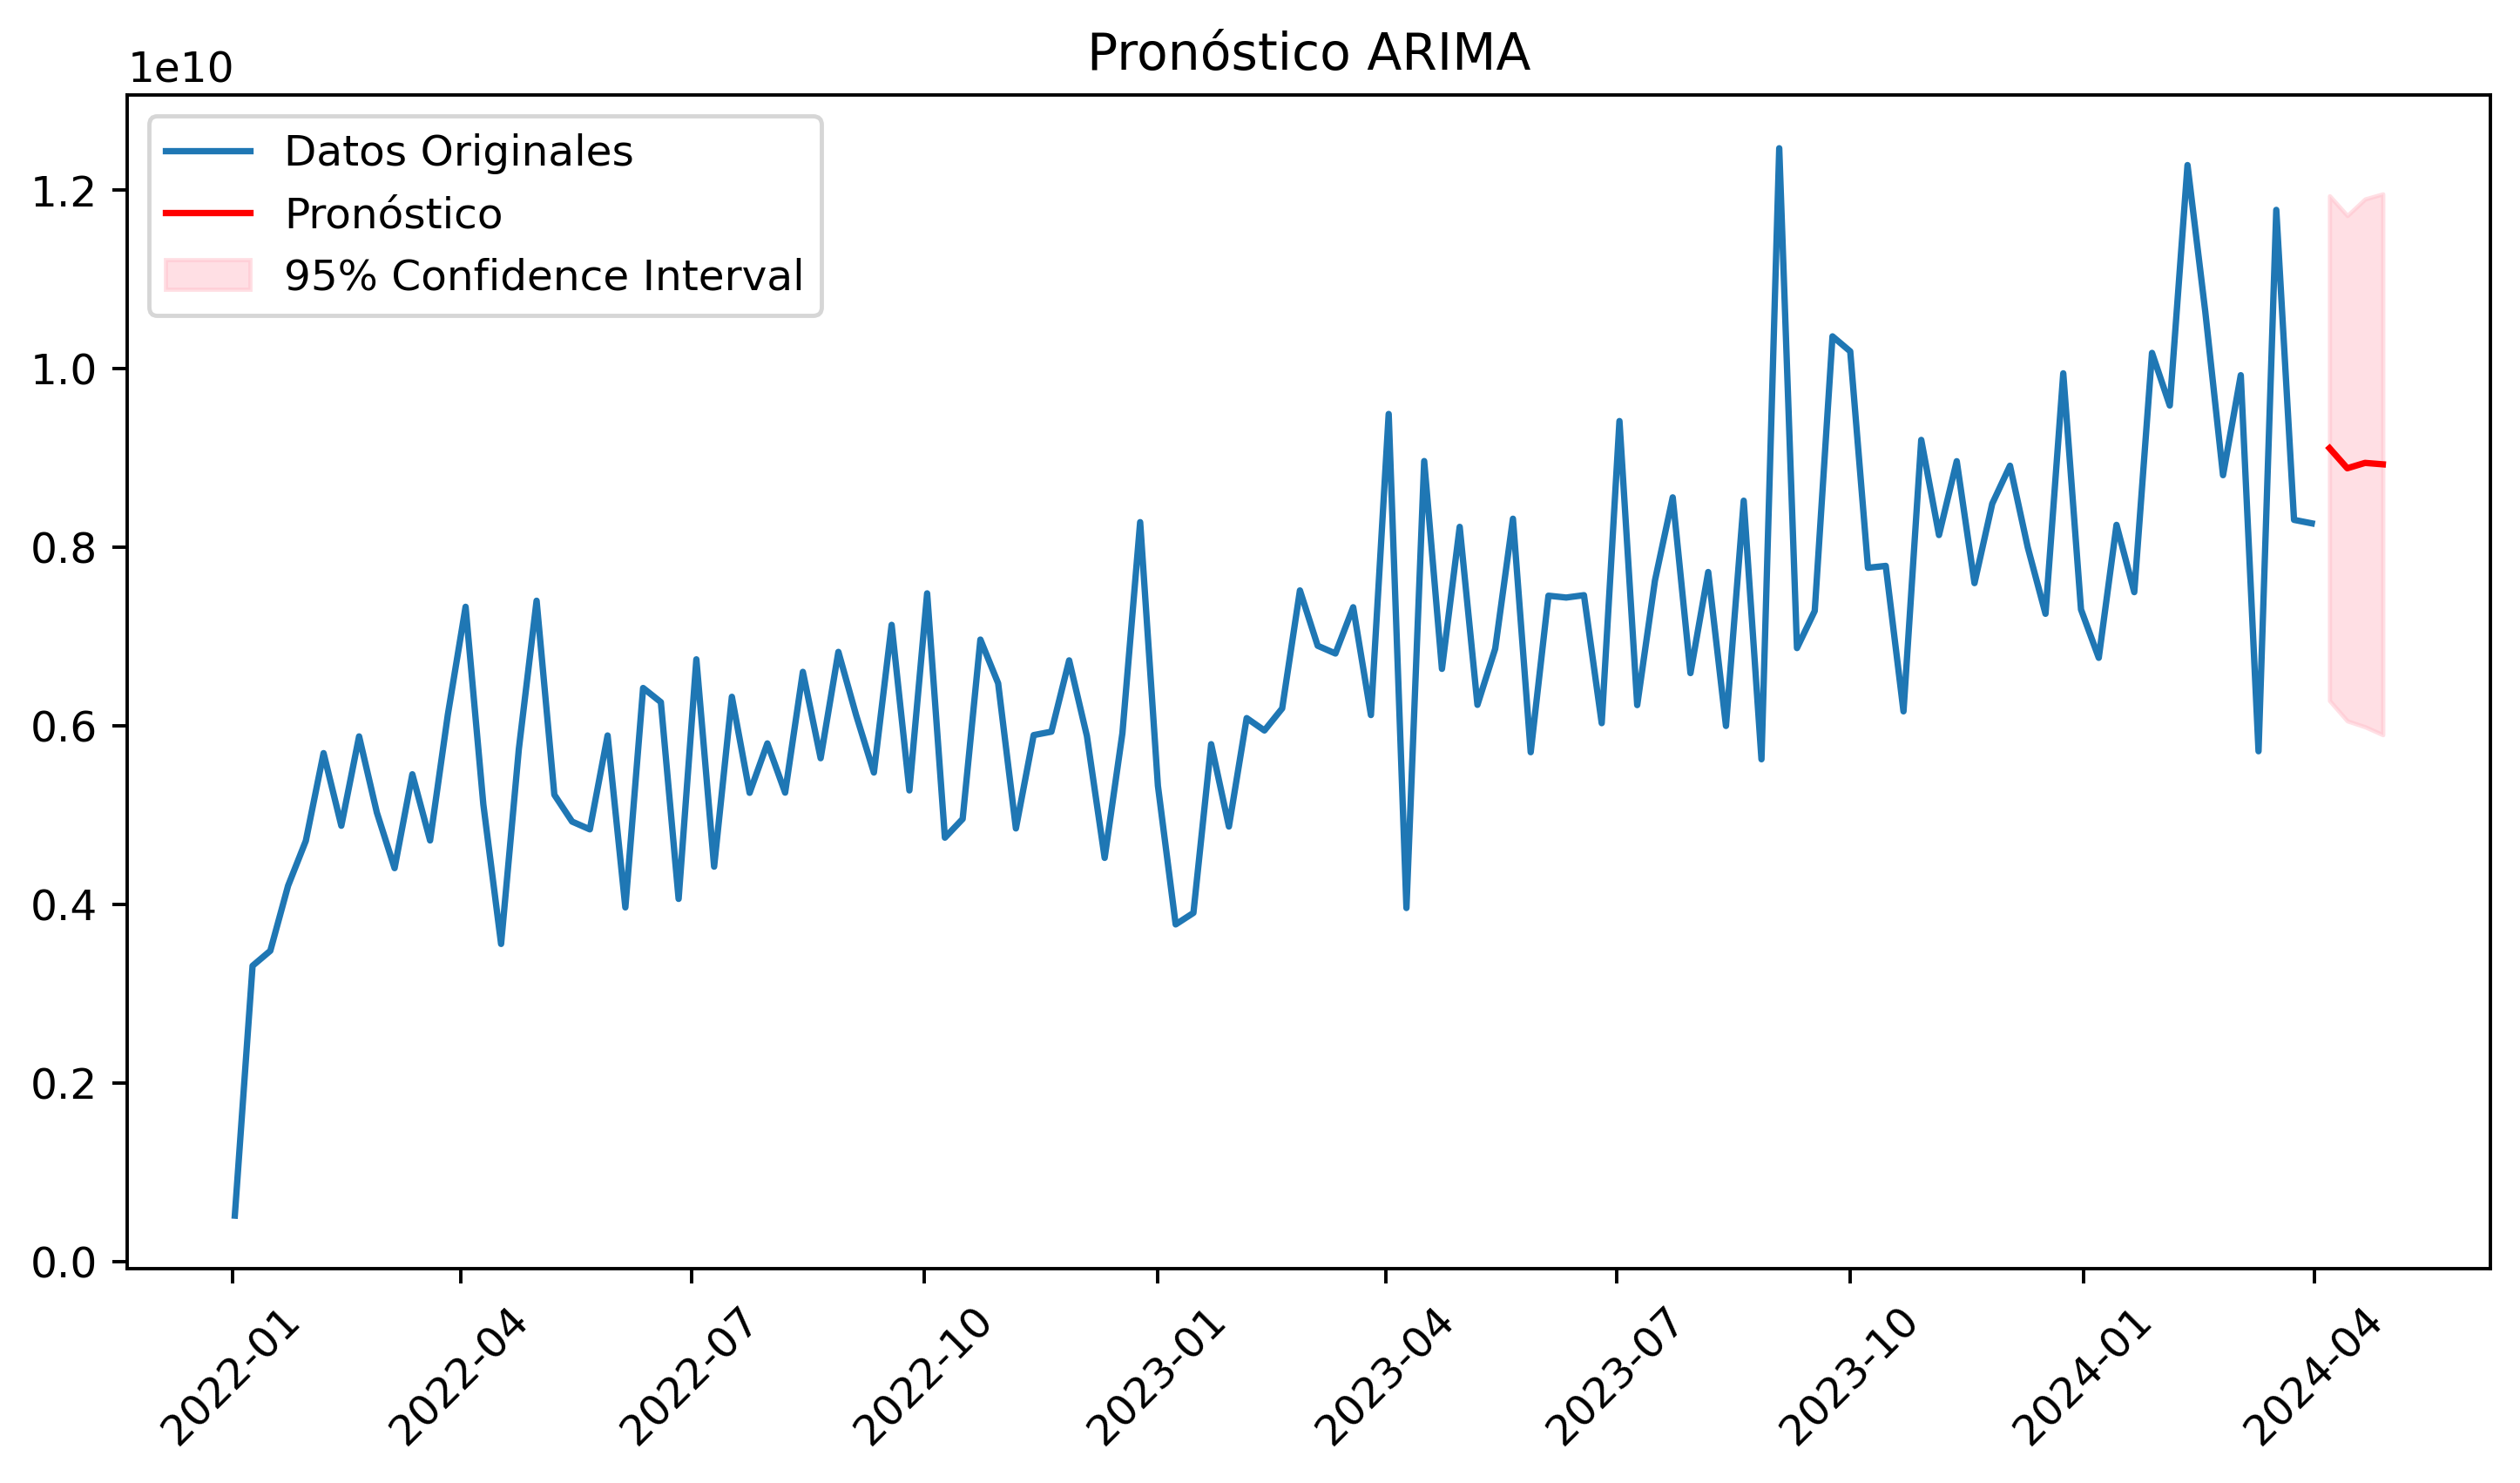

In [6]:
# Elabora resumen, pronósticos y gráfico del modelo
pron(df_group, orden, 4)